### Working with pyiwe

In [1]:
import os
import glob
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from Bio import Phylo as ph
from Bio.Phylo import Consensus
from ete3 import Tree as ETree, TreeStyle

import pyiwe
import pyiwe.utils.processing as tree_processing
import pyiwe.utils.visualize as tree_vis

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Reading  a test TNT-tree:

```python
Signature:
pyiwe.utils.processing.get_tnt_trees(
    tree_path: str,
    output_format: str = 'newick',
    verbose: bool = True,
) -> tuple[list[ph.BaseTree.Tree], str]
    """
    Read TNT tree and return it in format `output_format`.
    Args:
        tree_path:     str, the path to a tree
        output_format: str, possible formats: 'newick', 'nexus', 'nexml', 'phyloxml', newick is default
        verbose:       bool, verbosity for trees reading

    Returns: tuple[list[ph.BaseTree.Tree], str]
```

In [2]:
tree_tnt_path = os.path.join(pyiwe.config.pyiw_config.root_dir, 
                             'tests', 'testdata', 'bryocorini', 'bryocorini_fin.tre')
trees_bryocorini, raw_tree = tree_processing.get_tnt_trees(tree_path=tree_tnt_path,
                                                           output_format='newick',
                                                           verbose=True)
tree_bryocorini = trees_bryocorini[0]

Found 1 trees with number of nodes: [27]


In [3]:
print(f"A tree:\n{tree_bryocorini}\n\nRaw tree in text format:\n{raw_tree}")

A tree:
Tree(rooted=False, weight=1.0)
    Clade()
        Clade(name='Stenotus_binotatus')
        Clade()
            Clade(name='Angulonotus_grisescens')
            Clade()
                Clade()
                    Clade(name='Punctifulvius_kerzhneri')
                    Clade()
                        Clade(name='Cylapus_citus')
                        Clade(name='Palaucoris_sulawesicus_')
                Clade()
                    Clade()
                        Clade()
                            Clade(name='Helopeltis_clavifer')
                            Clade(name='Chamopsis_tuberculatus')
                        Clade()
                            Clade()
                                Clade(name='Sinervus_baerensprungi')
                                Clade()
                                    Clade()
                                        Clade(name='Pycnoderes_sp_')
                                        Clade(name='Sixeonotus_sp_')
                             

#### Plotting a tree:

ASCII text plot:

In [4]:
ph.draw_ascii(tree_bryocorini)

  __ Stenotus_binotatus
 |
 |   ___ Angulonotus_grisescens
 |  |
 |  |        ___ Punctifulvius_kerzhneri
_|  |    ___|
 |  |   |   |    ___ Cylapus_citus
 |  |   |   |___|
 |  |   |       |___ Palaucoris_sulawesicus_
 |  |   |
 |__|   |            ___ Helopeltis_clavifer
    |   |        ___|
    |   |       |   |___ Chamopsis_tuberculatus
    |   |       |
    |   |       |        __ Sinervus_baerensprungi
    |   |       |       |
    |   |       |    ___|       ___ Pycnoderes_sp_
    |   |    ___|   |   |   ___|
    |   |   |   |   |   |  |   |___ Sixeonotus_sp_
    |___|   |   |   |   |__|
        |   |   |   |      |    ___ Eccritotarsus_sp_
        |   |   |   |      |___|
        |   |   |   |          |    ___ Heterocoris_dilatatus
        |   |   |   |          |___|
        |   |   |___|              |___ Eurycipitia_clarus
        |   |       |
        |   |       |       ___ Bryocorella_emboliata
        |   |       |    __|
        |   |       |   |  |___ Hekista_laudator

Biopython plot:

Plotting params: https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams

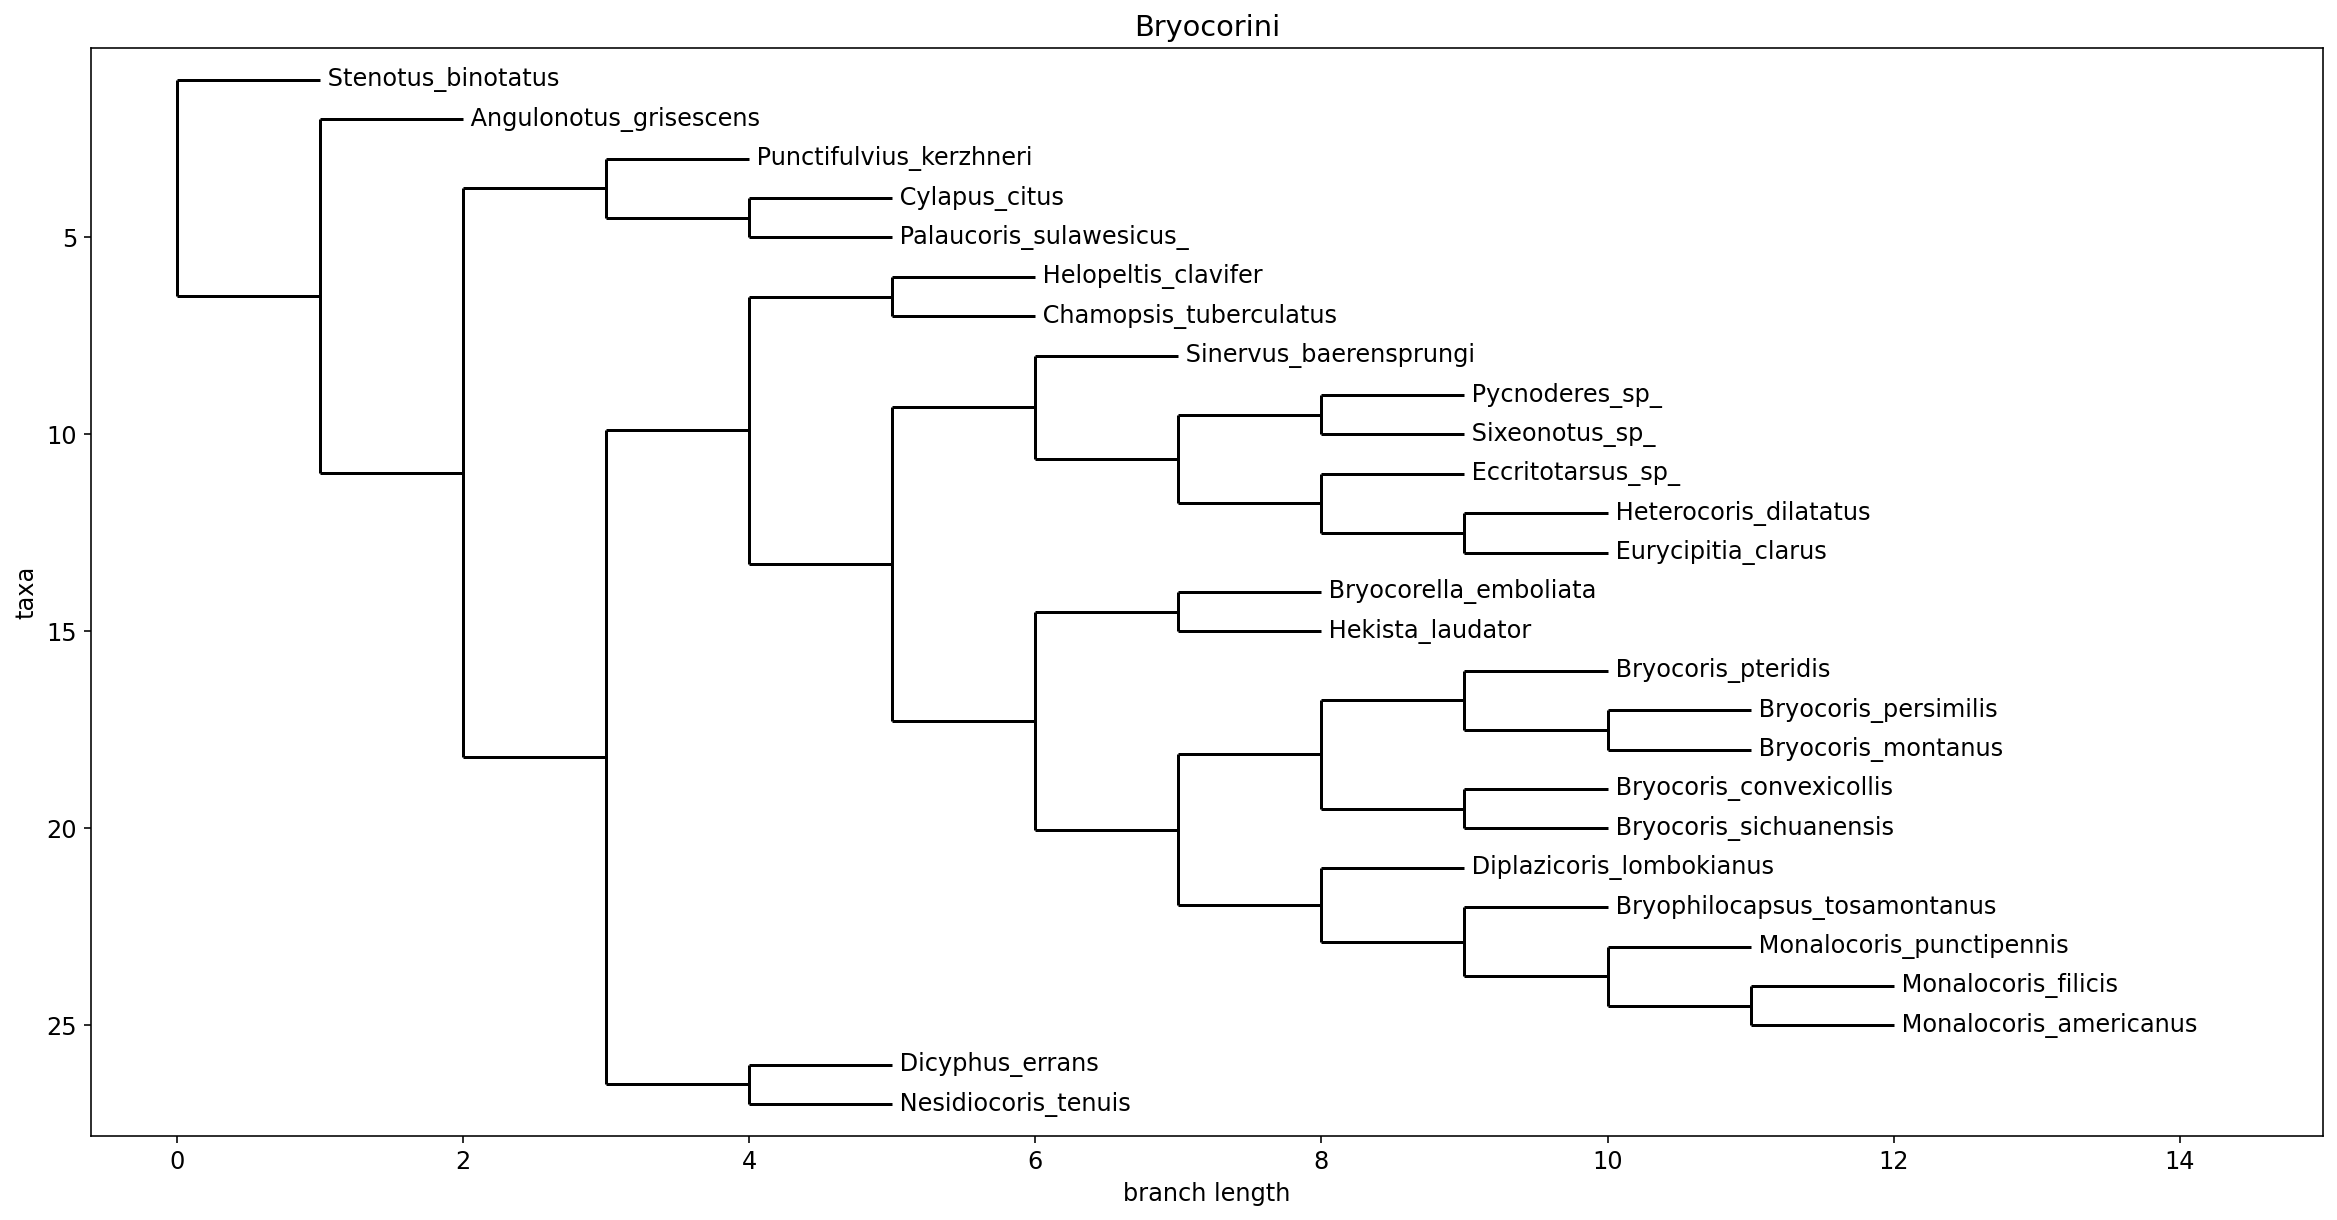

In [5]:
mpl.rcParams['figure.figsize'] = (20, 10)
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlelocation'] = 'center'

ph.draw(tree_bryocorini, 
        title={'loc': 'center', 
               'label': 'Bryocorini'}
       )
plt.show()

ETE toolkit plot:

Plotting examples with ETE: http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html

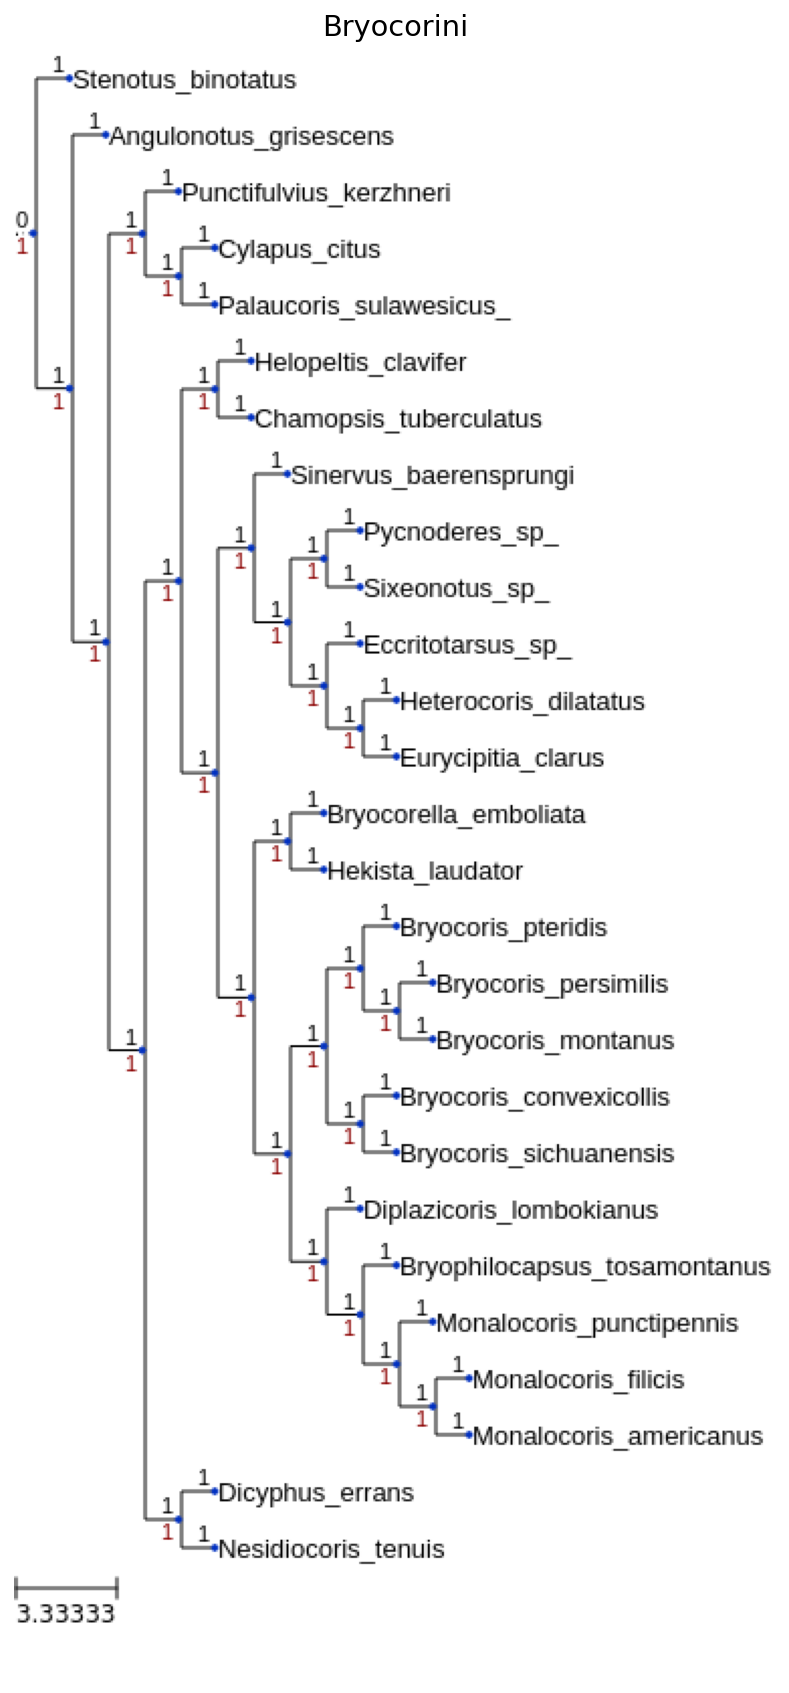

In [6]:
t = ETree(raw_tree)
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True

tree_vis.render_tree(t, title='Bryocorini', figsize=(15, 15),
                     kwargs={'units': 'px',
                             'tree_style': ts
                             }
                     )

Running ete3 tree browser. After executing `t.show()`, ETE window with a GUI will open.

In [7]:
t.show()

#### PyIW:


    TNT implied weighting parameters.
    Note, TNT scripting language offers more parameters. See TNT help.

    Args:
        k_start:        float, minimum concavity value in fit function;
        k_stop:         float, maximum concavity value in fit function;
        k_num:          int, number of samples to generate;

        x_mult: dict, run multiple replications, using 
                      sectorial searches, drifting, ratchet and fusing  combined;
                Keys:
                hits,      int, produce N hits to the best length and stop;
                level,     int, set level of search (0-10). Use 0-2 for easy data;
                drift,     int, cycles of drifting;

        k_scale:        str, scale of concavity values, 'log' or 'linear';
        output_folder:  str, path to store data;
        clear_output:   bool, clear temp files in output folder after processing;
        n_runs:         int, the number of repeated IW runs;
        hold:           int, a tree buffer to keep up to specified number of trees;
        float_prec: int, Floating point calculations precision:
                             If floating point enabled, uses N decimal digits when printing
                             floats (0 uses no digits; equivalent to integer only, but uses more memory);

        log_base: float, base for calculating a log space;
        noised_k: bool,  adjust k value at each iteration on the next runs;

        iw_iter_consensus: str, consensus type to merge trees output after each IW iteration.
                           Options: 'strict'(default), 'majority', 'adam';

        iw_iter_consensus_kwargs: dict, optional kwargs for iw_iter_consensus 'majority' or 'adam';

        tnt_seed: str, random seed properties for TNT.
                Options:
                N    set random seed as N ( 0 = time ; default = 1 )
                +N   increase random seed by N
                *    set a new random seed, at random
                [    in wagner trees, randomize insertion sequence
                ]    in wagner trees, try insertions for new taxa from
                   top to bottom or from bottom up (=default)
                >    in wagner trees, also randomize outgroup.  This
                   cannot be done when there are constraints or
                   asymmetric Sankoff characters (randomization is
                   skipped). Note that some "xmult" options use
                   internal constraints (and then skip randomization)
                <    in wagner trees, outgroup is always the first taxon
                   placed in the tree (=default)
                :N  in multiple randomizations, instead of making sure
                   that each new seed is different from the ones used
                   before, increase the seed by N.  This may save time
                   in very extensive randomizations (where checking
                   previous seeds takes time).  When N=0, checks previous
                   seeds (this the default).
                !    use quick approximation for randomization (faster)
                -    use careful randomizations (slower, more random; default)

        tnt_echo: str, `=`, echo each command, `-`, don't echo;

        memory:  int, Memory to be used by macro language, in KB;
        verbose: bool, add processing verbosity;

#### Init PyIW instance and run `get_iw_branch_support`

In [8]:
pyiwe_instance = pyiwe.PyIW(
    k_start=0.01,
    k_stop=1.5,
    k_num=100,
    n_runs=5,
    x_mult={'hits': 5, 'level': 3, 'drift': 5},
    tnt_seed=1,
    output_folder='./output',
    verbose=False
)

In [ ]:
features_path = os.path.join(pyiwe.config.pyiw_config.root_dir,
                             'tests', 'testdata', 'bryocorini', 'SI_4_Bryocorinae_matrix.tnt')
majority_tree, k_alloc = pyiwe_instance.get_iw_branch_support(matrix_path=features_path, cutoff=0.5)

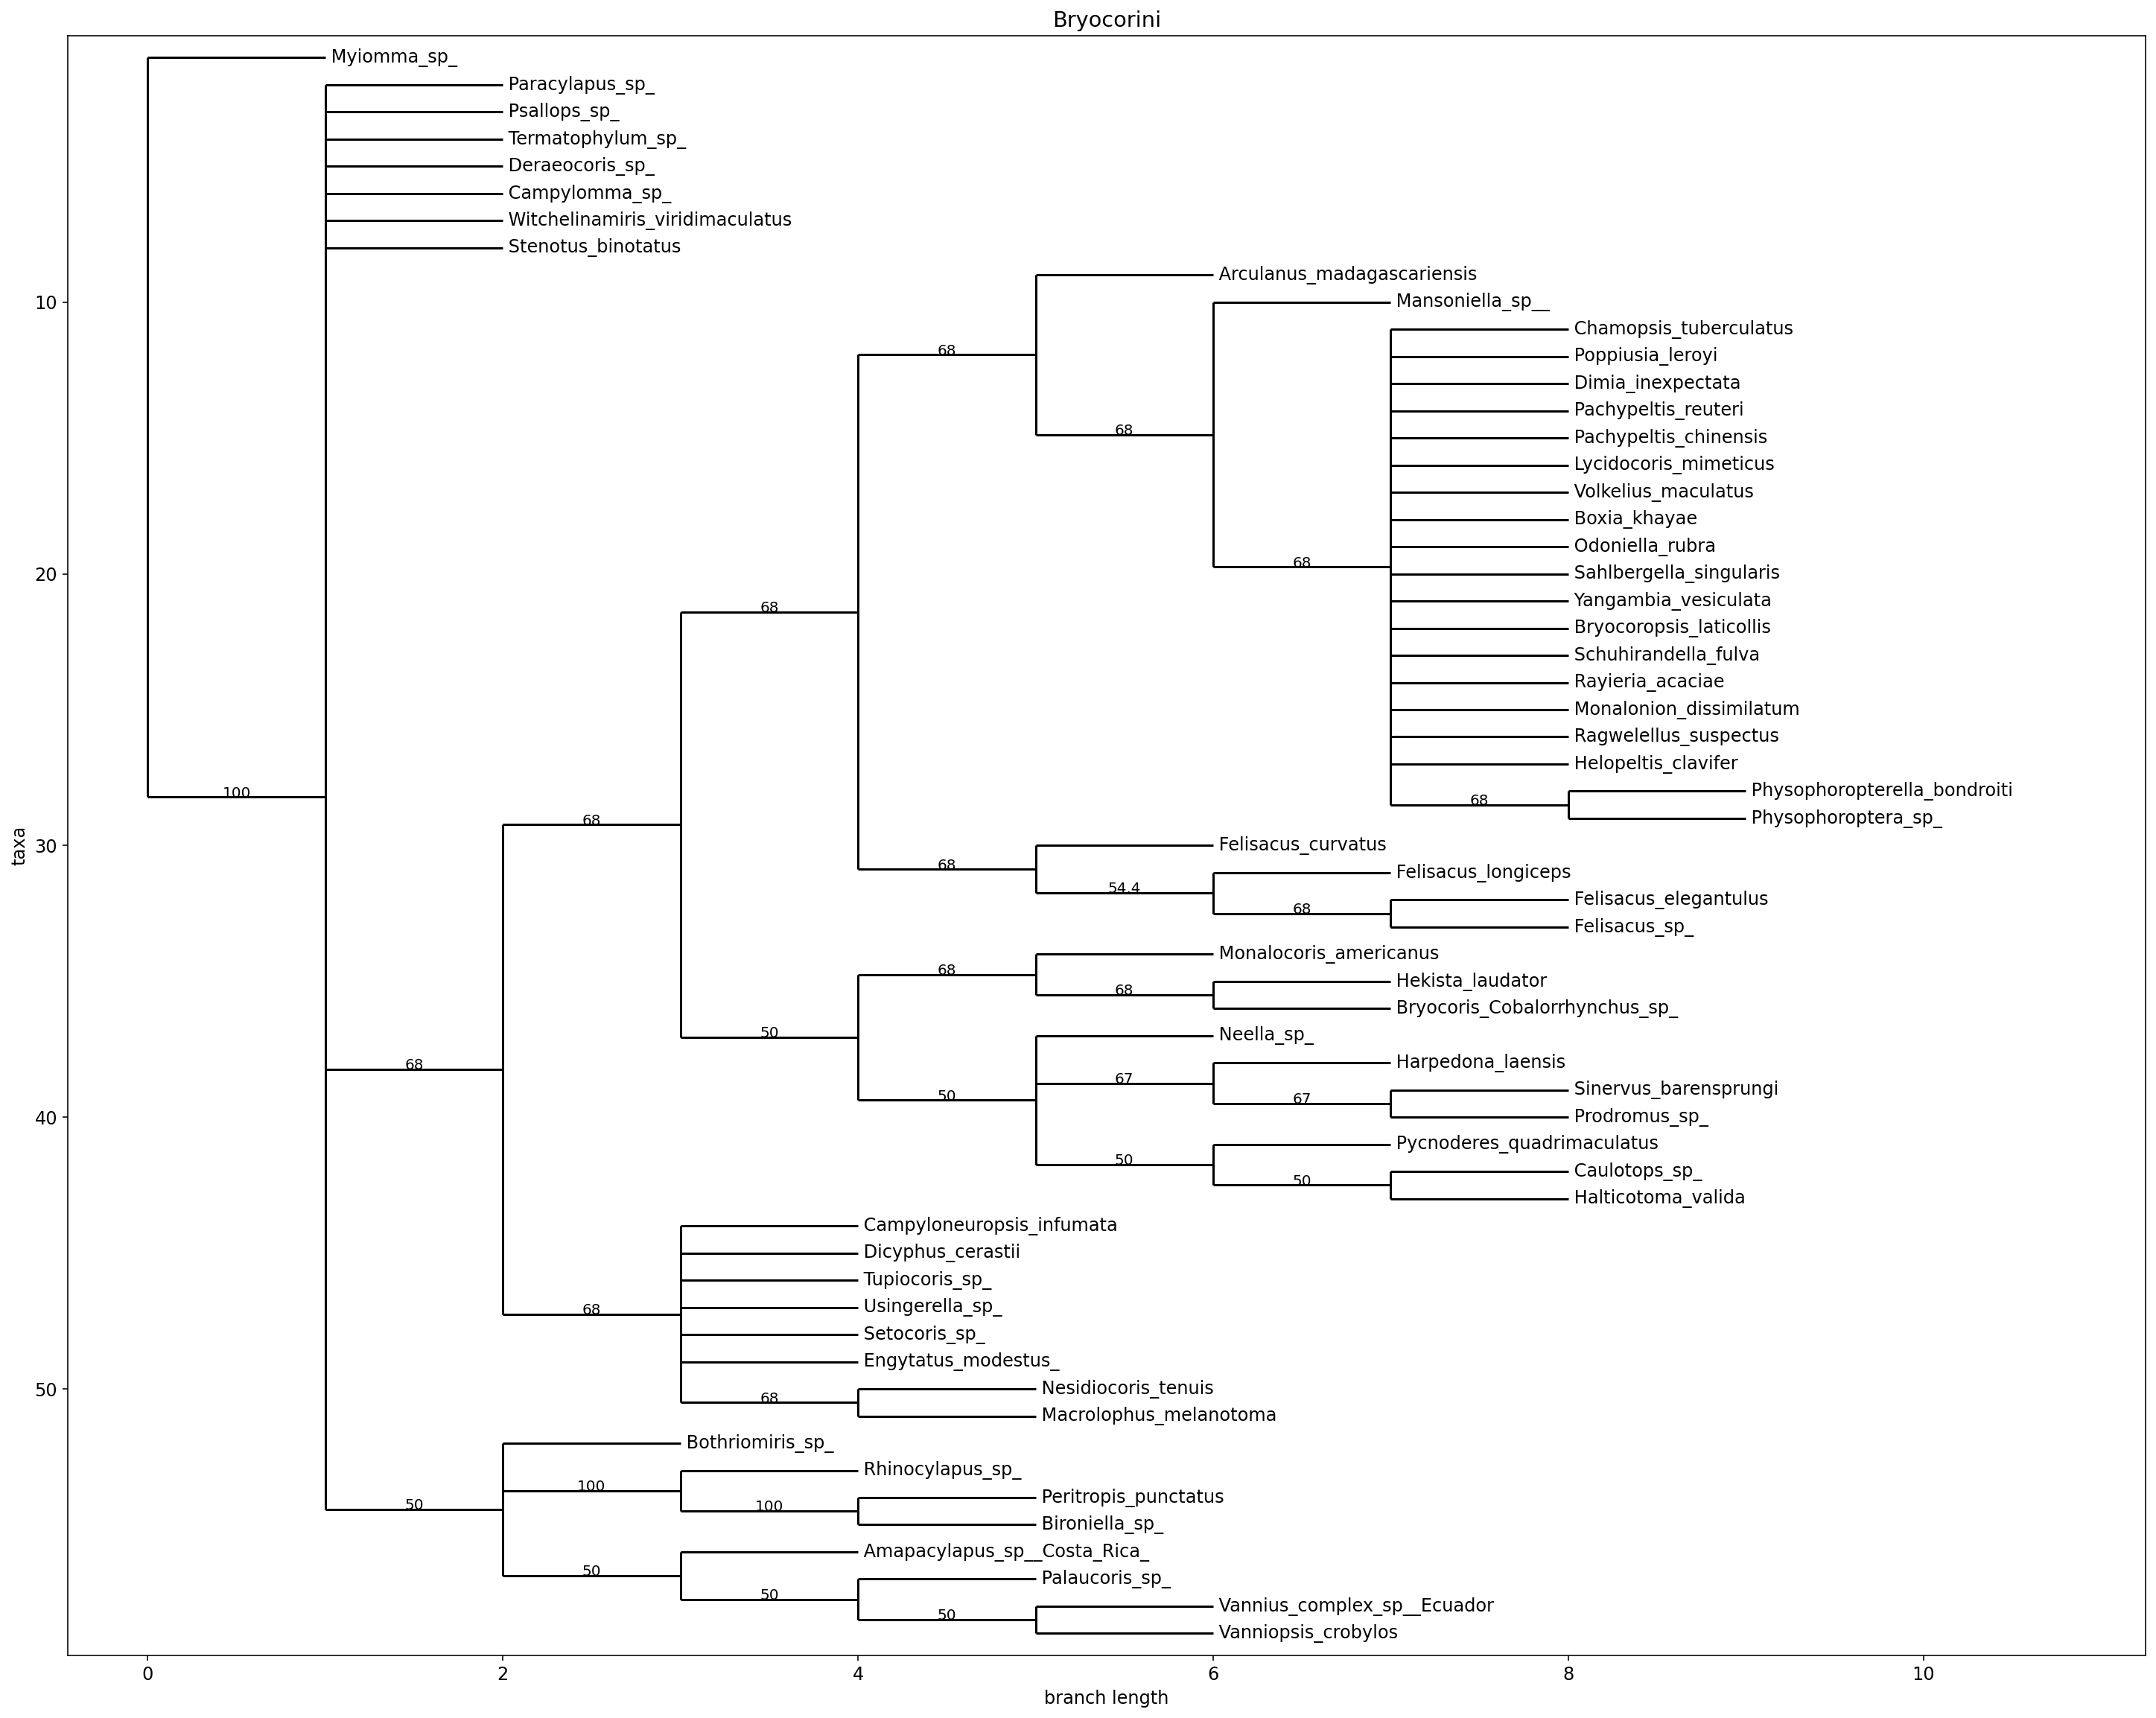

In [10]:
mpl.rcParams['figure.figsize'] = (25, 20)
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlelocation'] = 'center'
ph.draw(majority_tree, 
        title={'loc': 'center', 
               'label': 'Bryocorini'}
       )
plt.show()

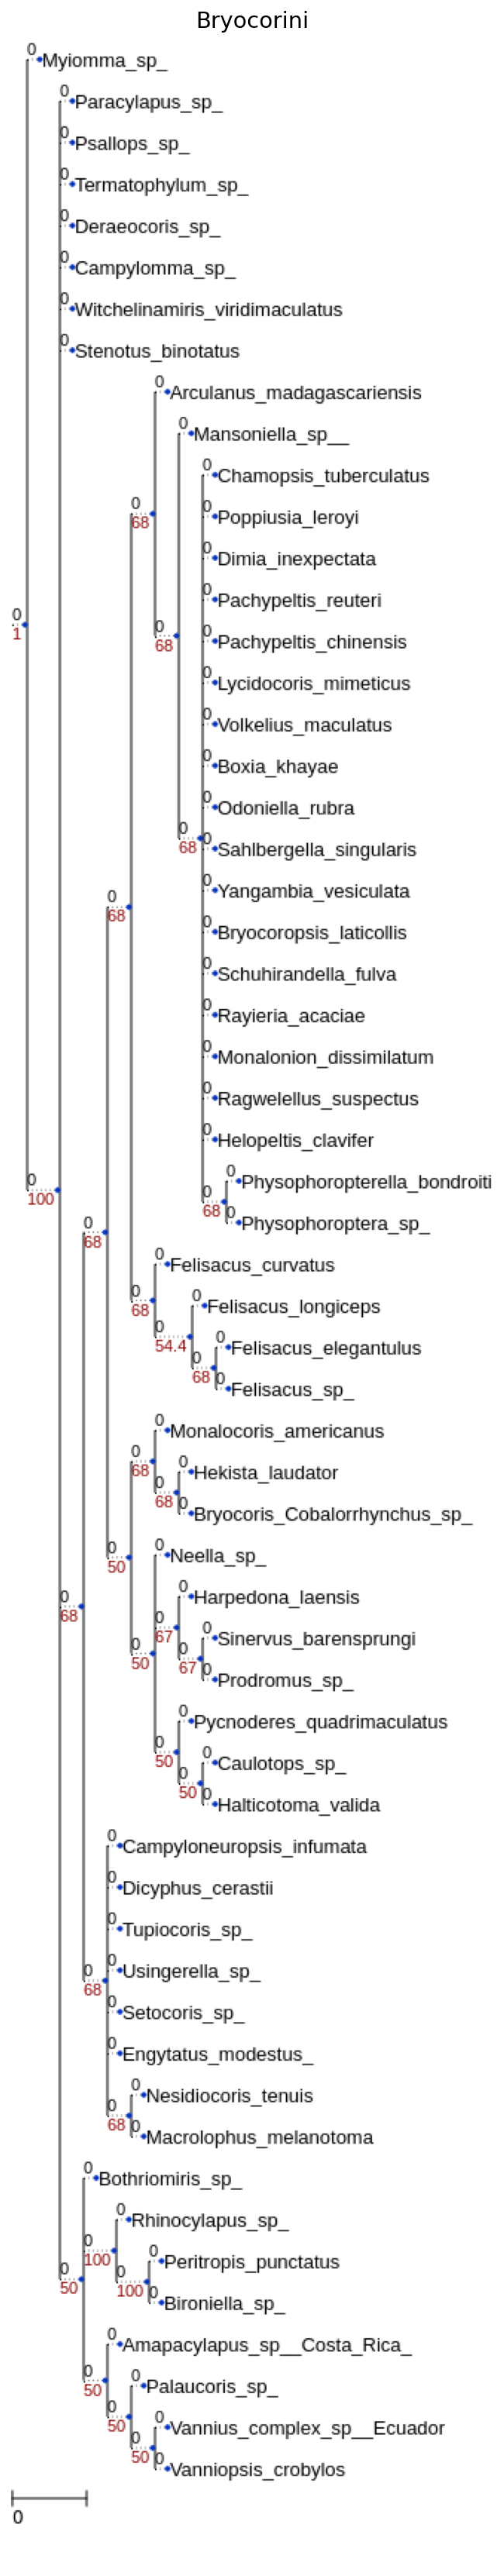

In [11]:
t = ETree(majority_tree.format(format='newick'))
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True

tree_vis.render_tree(t, title='Bryocorini', figsize=(30, 30),
                     kwargs={'units': 'px',
                              'tree_style': ts
                             }
                     )

Running ete3 tree browser. After executing `t.show()`, ETE window with an interface will open:

In [12]:
t.show()

Getting a table with clades, supports and IW values:

In [13]:
df_tree = pd.DataFrame(k_alloc).T
df_tree['child_nodes'] = df_tree['clade'].apply(lambda x: len(x))
df_tree['clade_id'] = df_tree.index
df_tree

,clade,k_vals,confidence,child_nodes,clade_id
0,"(Myiomma_sp_, Paracylapus_sp_, Psallops_sp_, T...","(5.78846, 8.47435, 1.97878, 1.39783, 21.60153,...",None,59,0
1,"(Paracylapus_sp_, Psallops_sp_, Termatophylum_...","(5.78846, 8.47435, 1.97878, 1.39783, 21.60153,...",100.0,58,1
2,"(Arculanus_madagascariensis, Mansoniella_sp__,...","(5.78846, 1.39783, 21.60153, 15.8141, 1.30522,...",68.0,43,2
3,"(Arculanus_madagascariensis, Mansoniella_sp__,...","(5.78846, 1.39783, 21.60153, 15.8141, 1.30522,...",68.0,35,3
4,"(Arculanus_madagascariensis, Mansoniella_sp__,...","(5.78846, 1.39783, 21.60153, 15.8141, 1.30522,...",68.0,25,4
5,"(Arculanus_madagascariensis, Mansoniella_sp__,...","(5.78846, 1.39783, 21.60153, 15.8141, 1.30522,...",68.0,21,5
6,"(Mansoniella_sp__, Chamopsis_tuberculatus, Pop...","(5.78846, 1.39783, 21.60153, 15.8141, 1.30522,...",68.0,20,6
7,"(Chamopsis_tuberculatus, Poppiusia_leroyi, Dim...","(5.78846, 1.39783, 21.60153, 15.8141, 1.30522,...",68.0,19,7
8,"(Physophoropterella_bondroiti, Physophoroptera...","(5.78846, 1.39783, 21.60153, 15.8141, 1.30522,...",68.0,2,8
9,"(Felisacus_curvatus, Felisacus_longiceps, Feli...","(5.78846, 1.39783, 21.60153, 15.8141, 1.30522,...",68.0,4,9


Making k distributions plot:

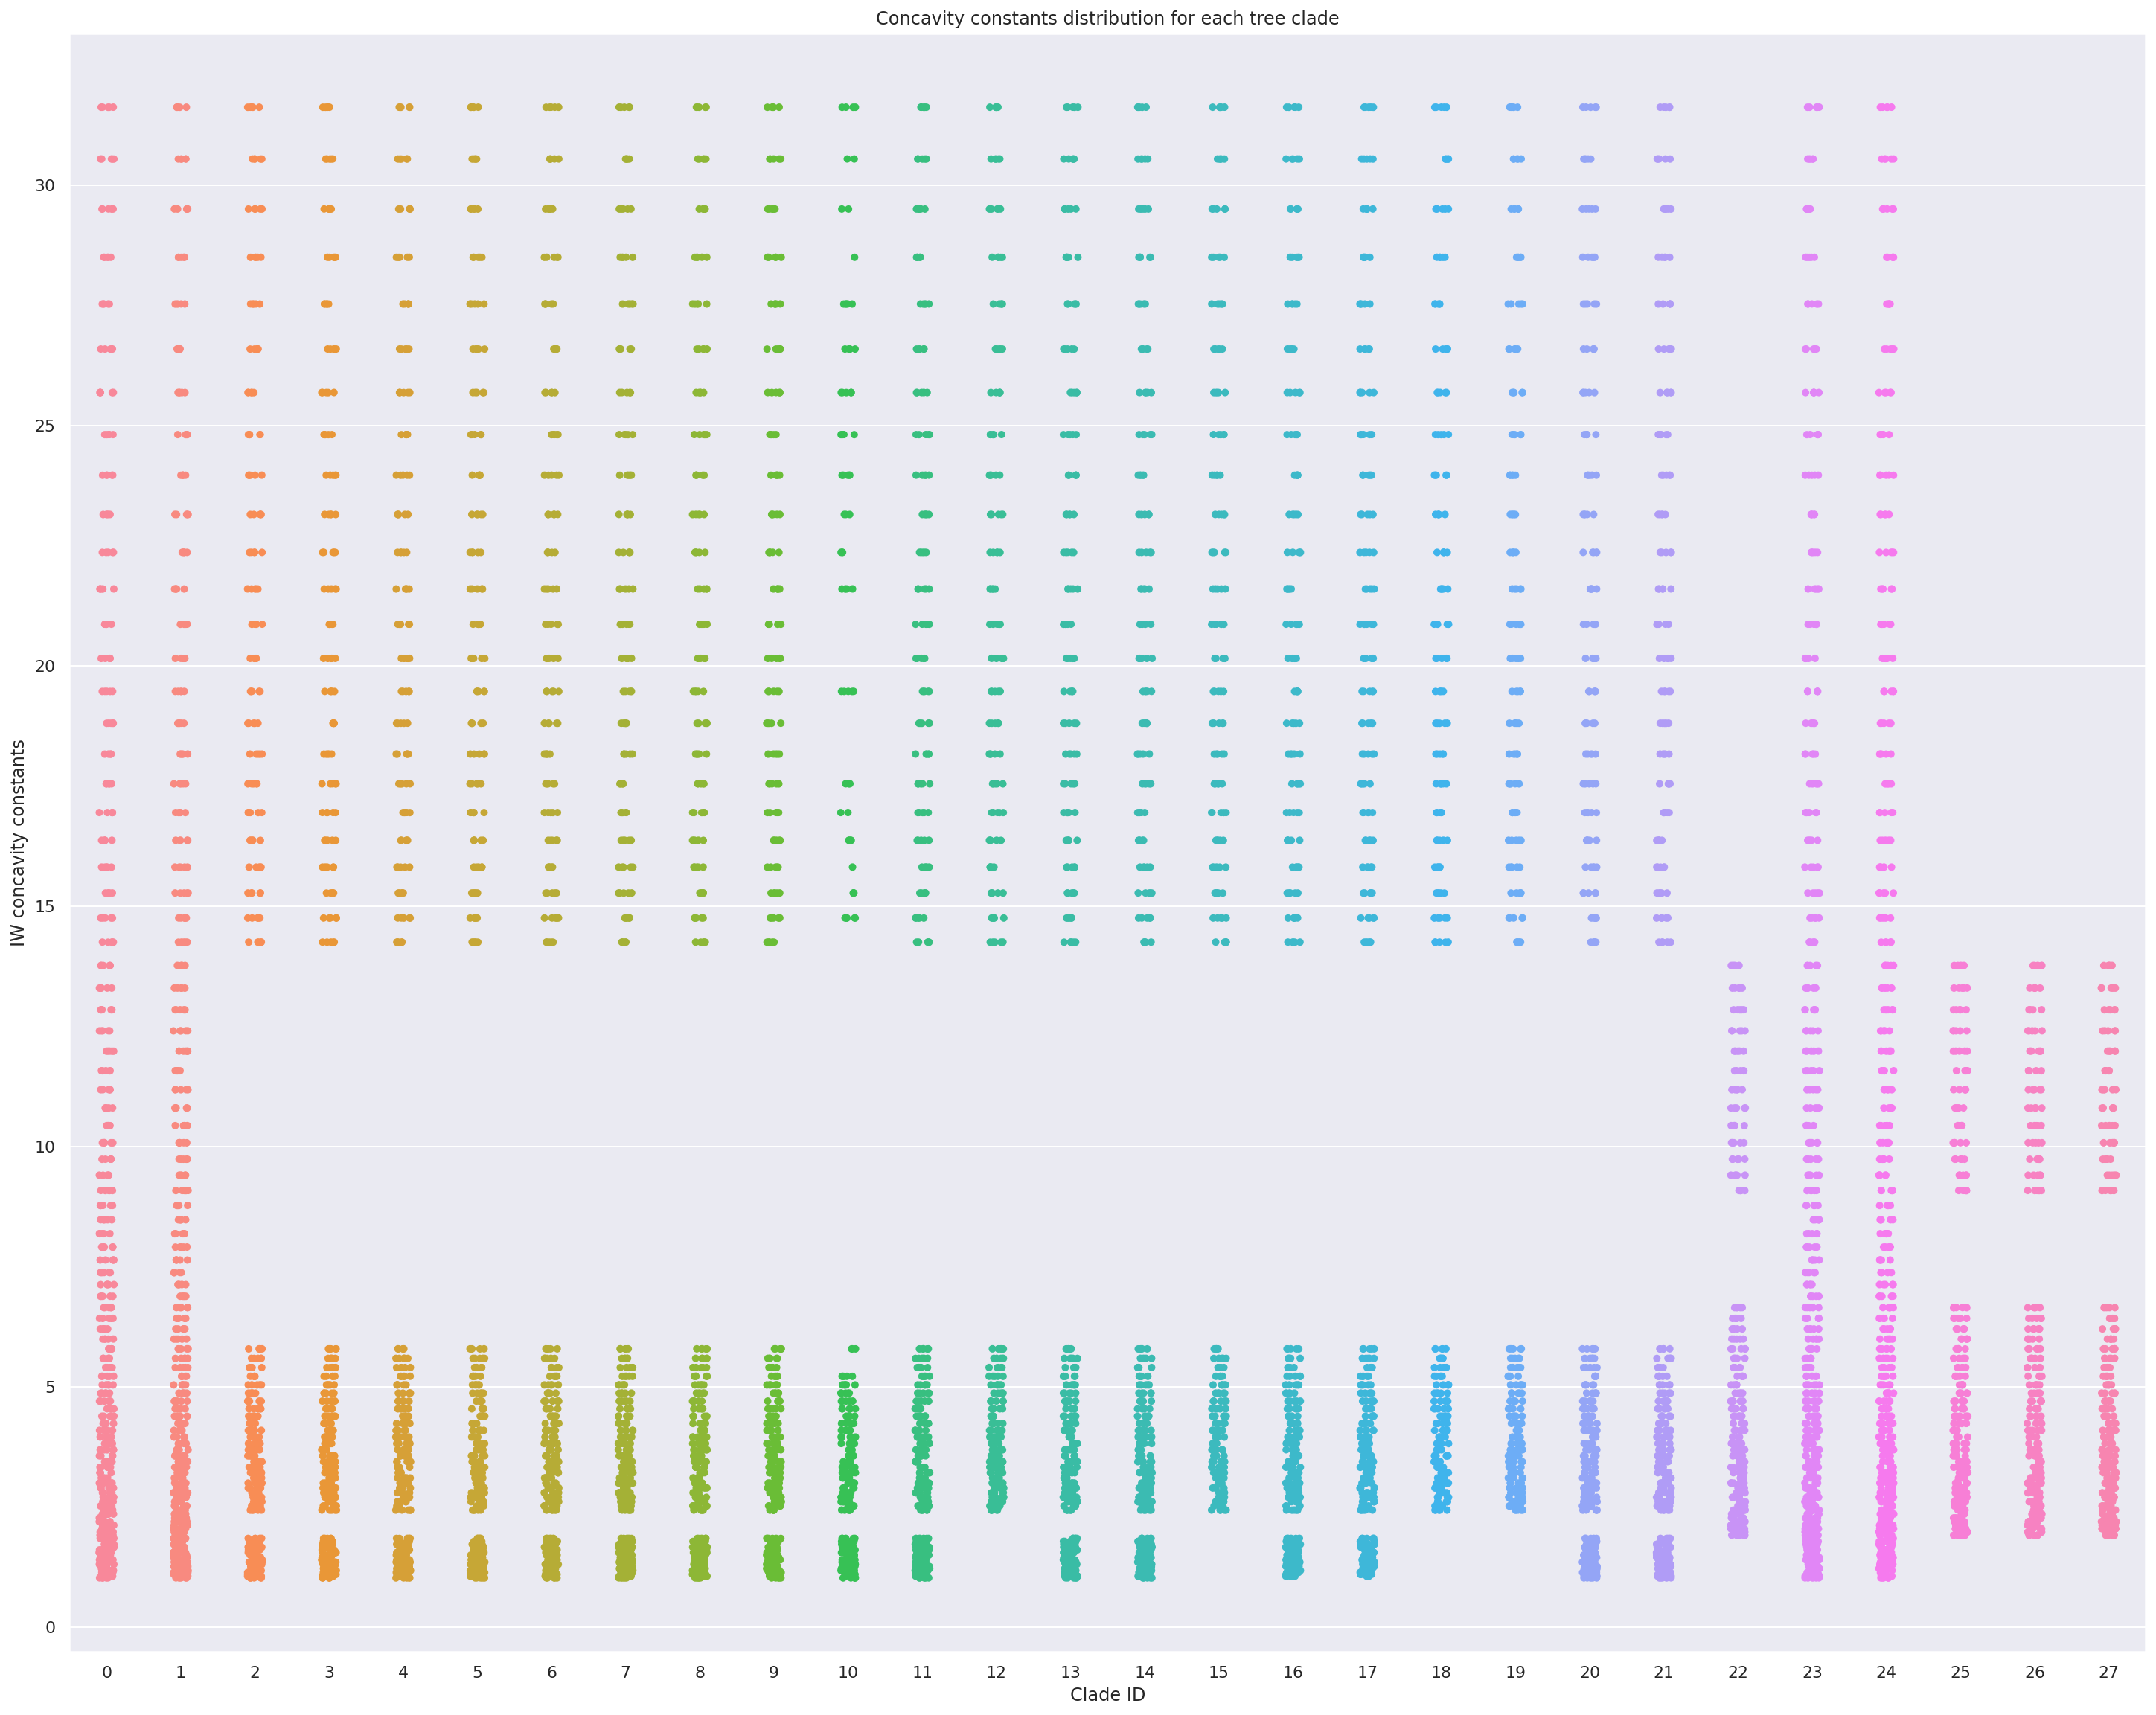

In [14]:
# Flatten table based on `k_vals` column
df_tree_flat = df_tree.explode(column=['k_vals'])
tree_vis.make_k_stripplot(df=df_tree_flat,
                          x='clade_id', y='k_vals',
                          save=True
                          )
plt.show()